In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split



In [2]:

# Cargar el conjunto de datos desde el CSV
dataset = pd.read_csv('50_Startups.csv')


#### NORMALIZACION DE DATOS

In [3]:


def normalizationZscore(data):
    """Normalizacion de z-score"""

    mean = np.mean(data, axis=0)
    desviacionEstandar = np.std(data, axis=0)
    normalizationData = (mean - data) /desviacionEstandar
    return normalizationData

def normalizationMinMax(data):
    """Normalizacion de minmax"""
    minData = np.min(data, axis=0)
    maxData = np.max(data, axis=0)
    normalizationData = ((data - minData)/(maxData - minData))
    return normalizationData

def normalizacioneSimple(data):
    """"Normalizacion simple"""
    maxData = np.max(data,axis=0)
    return (data / maxData)

In [4]:


# Crear un DataFrame
df = pd.DataFrame(dataset, columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'])


#separando x y Y con data frame
x_data = df.iloc[:,:2]
y_data = df.iloc[:,-1:]

#convertir a array numpy
x_data = np.array(x_data)
y_data = np.array(y_data)

#normalizando x  y
x_normalizado = normalizationZscore (x_data)
y_normalizado = normalizationZscore ( y_data)
# x_normalizado

In [5]:
"""Separecion de la data en 'train' y 'test' """
x_train, x_test, y_train, y_test = train_test_split(x_normalizado, y_normalizado, test_size=0.3, random_state=42)


In [6]:
"""Class de Regresion logistica multivariable"""

class LinearRegressionMultivarible:

    def __init__(self,numberInpedent):

        """
        seed ---> generamos la semilla para los resultados sean estaticos
        numberInpedent -----> es la cantidad de valores independientes
        """
        
        #np.random.seed(2001)
        self.w = np.random.rand(numberInpedent).reshape(-1,1)
        self.b = np.random.rand()

        # print(f'self.w : {self.w} y su shape es {np.shape(self.w)}')

    def H(self,x):

        """
        x ---> un matrix de la variables inpedendiantes
        w ---> como es w un matrix de una solo fila y n columnas podemos multipliar directament 
                con el variables independiente que le corresponde
        """
        predictor = np.dot(x, self.w) + self.b
        # print(f' el predictor es h es {predictor}')
        
        return predictor
    

    def Loos(self, x , y):
        """
        x   -------> el matrix de los variables independientes
        y   -------> es el y real y es una matrix de las salidas
        y_plane_predictor -------> nos devuelve la matrix de predecidos
        loss ----> nos devuelve el resultado escalar es decir el MSE
        """
        
        y_plane_predictor = self.H(x)
        loss = (np.linalg.norm(y - y_plane_predictor)**2) / (2*len(y))
        
        # print(f'El loss es {loss}')
        return loss, y_plane_predictor
    
    def Derivates(self, x, y, y_pred):
        """
        dw  ----> devuelve una matrix de los coeficientes de x
        db  ----> devuelve la suma del baias """
        
        dw = np.dot(x.T,(y_pred - y)) / len(y)
        db = np.sum(y_pred - y) /len(y)

        return dw,db
    
    def change_params (self, dw,db,alpha):
        self.w = self.w.reshape(-1, 1) 
    
        self.w = self.w - alpha*dw
        self.b = self.b - alpha*db

        return self.w, self.b
    
    def train(self,x,y,alpha,epochs):
        error_list = []
        time_stamp = []
        params = []

        print("Starting train")
        for i in range(epochs):
            loss , y_predic = self.Loos(x,y)
            error_list.append(loss)
            time_stamp.append(i)
            dw,db = self.Derivates(x,y,y_predic)
            self.change_params(dw,db,alpha)
            params.append([dw,db])

            if (i % 500 == 0):
                print(f'Loos en la epoca {i} es :{loss}')
                self.plot_plane(x[:,:1],x[:,1:2],y_predic)

        return time_stamp, error_list, params, y_predic
    

    def test(self,x_test):
        y_test_predic = self.H(x_test)

        loss = (np.linalg.norm(y_test - y_test_predic)**2) / (2*len(y_test_predic))

        return loss , y_test_predic
    

    def plot_error(self, time, loss):
        plt.plot(time,loss)
        plt.title("Loss in the time")
        plt.xlabel("time")
        plt.ylabel("Loss")
        plt.show()

    def plot_line(self,x,y,y_pre):
        plt.plot(x,y,'*')
        plt.plot(x,y_pre)
        plt.show()

    def plot_plane(self,xx,zz,yy):
        
        #creaate figure 3d
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')

        #grafica la figura en 3d
        ax.scatter(xx, zz, yy.reshape(xx.shape), c='r', marker='o')



        #configuracion
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        #crea la malla 
        X1_mesh, X2_mesh = np.meshgrid(xx, zz)
        y_pred_mesh = self.b + self.w[0] * X1_mesh + self.w[1] * X2_mesh

        ax.plot_surface(X1_mesh, X2_mesh, y_pred_mesh, alpha=0.5, cmap='viridis' )

        # Mostrar el gráfico
        plt.show()

    def accuracy(self, y_true, y_predic, threshold=0.3):
            """Calcula la precisión para datos de regresión. Este método utiliza un umbral,
            lo que significa que una predicción se considera correcta si cae dentro de un cierto rango."""
            correct_predictions = sum(abs(y_true - y_predic) <= threshold)
            total_predictions = len(y_predic)
            result_accuracy = correct_predictions / total_predictions
            return result_accuracy
    


Starting train
Loos en la epoca 0 es :0.8639067547069333


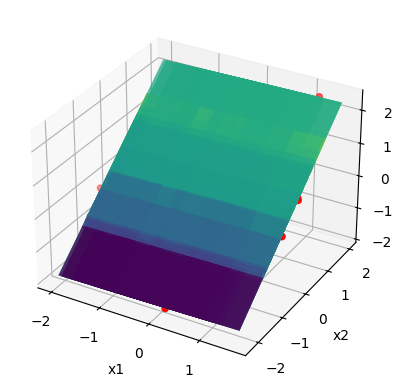

Loos en la epoca 500 es :0.027697595906397095


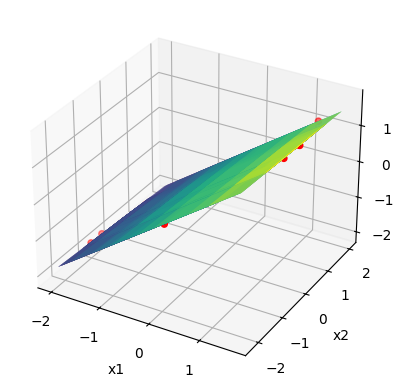

Loos en la epoca 1000 es :0.027305069362267172


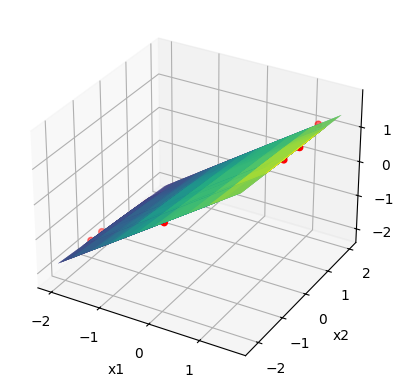

Loos en la epoca 1500 es :0.027304864565269205


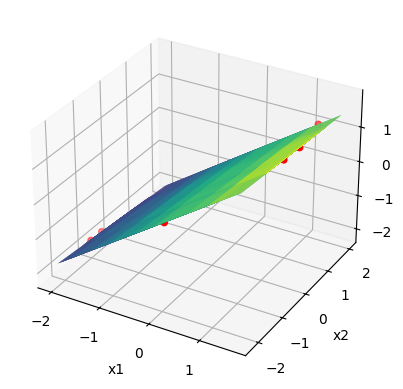

In [7]:
LRM =  LinearRegressionMultivarible(2)

time_stamp, error_list, params, y_predic = LRM.train(x_train, y_train, alpha=0.01, epochs=2000)


Loss print vs epochs graph :


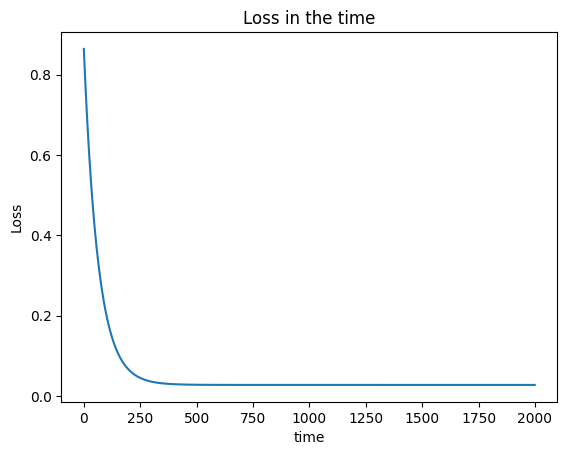

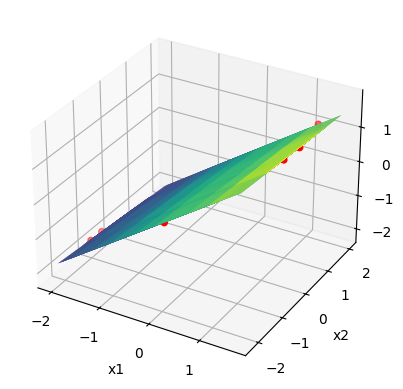

In [8]:
# display for training 

print("Loss print vs epochs graph :") 

LRM.plot_error(time_stamp,error_list) # # Display how the error decreases over epochs

LRM.plot_plane (x_train[:,:1],x_train[:,1:2] , LRM.H(x_train))

### Testing

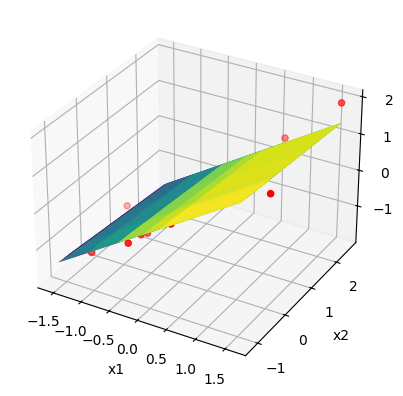

In [9]:
#testing
loss, y_test_predic = LRM.test(x_test)


#Display the line plot for the test set
LRM.plot_plane(x_test[:,:1],x_test[:,1:2] , y_test)

### Metrics 

In [10]:
#accuaracy del entrenamiento 
accuracy_train = LRM.accuracy(y_train,y_predic)
print(f'The acurracy train : {accuracy_train}')

#acucuracy the testing
accuracy_test = LRM.accuracy (y_test,y_test_predic)
print(f'The accuracy test : {accuracy_test}')

The acurracy train : [0.85714286]
The accuracy test : [0.8]


### PROBANDO EL SEGUNDO 

In [11]:

dataWorld = pd.read_csv('WorldHappinessReport.csv')
dataWorld

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [12]:
## separacion de datos
#separando x y Y con data frame
x_happiness = dataWorld.iloc[:,4:6]
y_happiness = dataWorld.iloc[:,6:7]

#convertir a array numpy
x_happiness_array = np.array(x_happiness)
y_happiness_array = np.array(y_happiness)

# #normalizando x  y
# x_normalizado = normalizationZscore (x_data)
# y_normalizado = normalizationZscore ( y_data)
# x_normalizado
x_Lower = x_happiness_array[:,0:1]
x_Upper = x_happiness_array[:,1:2]



In [13]:
y_happiness_array

array([[1.44178],
       [1.52733],
       [1.42666],
       [1.57744],
       [1.40598],
       [1.44015],
       [1.46468],
       [1.36066],
       [1.44443],
       [1.45181],
       [1.33766],
       [1.45038],
       [1.50796],
       [1.06879],
       [1.35943],
       [1.44787],
       [1.08754],
       [1.42539],
       [1.48341],
       [1.69752],
       [1.11508],
       [1.64555],
       [1.40283],
       [1.2167 ],
       [1.18306],
       [1.15137],
       [1.30915],
       [1.57352],
       [1.18157],
       [1.30782],
       [1.03032],
       [1.39488],
       [1.0893 ],
       [1.48953],
       [1.39729],
       [1.82427],
       [1.34253],
       [1.05266],
       [0.83454],
       [1.09686],
       [1.61714],
       [1.44024],
       [1.32572],
       [1.13367],
       [1.27973],
       [0.8737 ],
       [1.25142],
       [0.69384],
       [0.73591],
       [1.35495],
       [0.97306],
       [0.87616],
       [1.38007],
       [1.22943],
       [0.69177],
       [1.

Starting train
Loos en la epoca 0 es :14.500225731274053


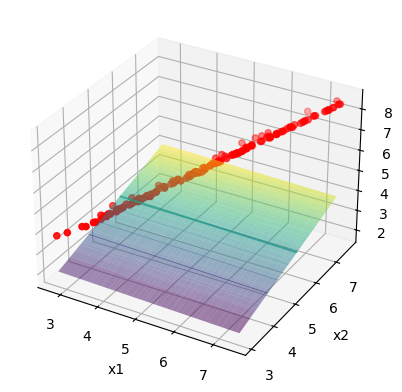

Loos en la epoca 500 es :0.05699381031659101


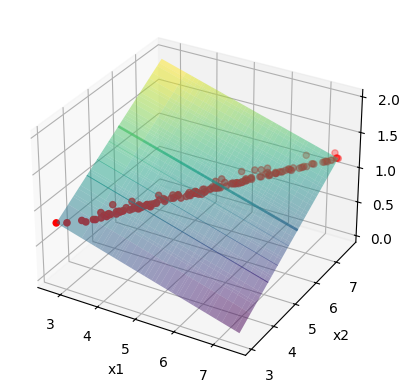

Loos en la epoca 1000 es :0.048094358520974864


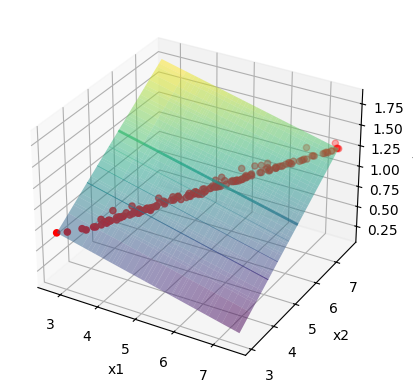

Loos en la epoca 1500 es :0.04233746763374942


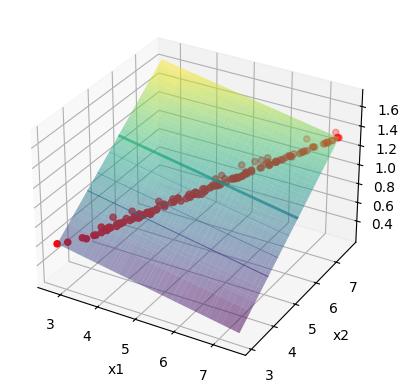

In [14]:
LRM2 =  LinearRegressionMultivarible(2)

time_stamp_, error_list_, params, y_predichoo = LRM2.train(x_happiness_array, y_happiness_array, alpha=0.01, epochs=2000)

In [15]:
def plot_3d(xx,zz,yy):
    
    #creaate figure 3d
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    #grafica la figura en 3d
    ax.scatter(xx, zz, yy.reshape(xx.shape), c='r', marker=f'*')



    #configuracion
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    #crea la malla 
    # X1_mesh, X2_mesh = np.meshgrid(xx, zz)
    # y_pred_mesh = self.b + self.w[0] * X1_mesh + self.w[1] * X2_mesh

    # ax.plot_surface(X1_mesh, X2_mesh, y_pred_mesh, alpha=0.5, cmap='viridis')

    # Mostrar el gráfico
    plt.show()

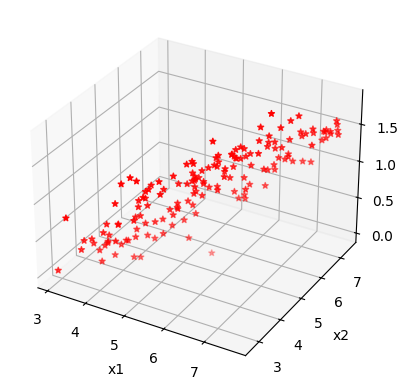

In [16]:
plot_3d(x_Upper,x_Lower,y_happiness_array)